<a href="https://colab.research.google.com/github/bahramiofficial/uniProject/blob/master/longlatclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [2]:
df = pd.read_csv('/content/LatLong.csv', sep=';') 
df.head()

,Longitude,Latitude
0,36.861544,-5.177747
1,51.463766,5.392935
2,51.190492,4.453765
3,51.326247,6.085953
4,51.463766,5.392935


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  9895 non-null   float64
 1   Latitude   9895 non-null   float64
dtypes: float64(2)
memory usage: 154.7 KB


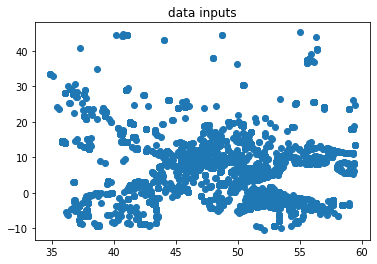

In [7]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('data inputs')
plt.show()

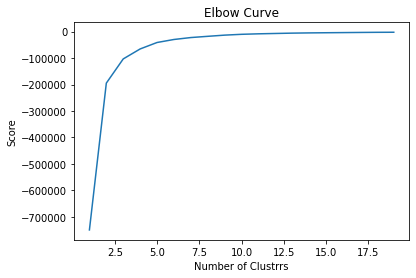

In [8]:
k_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in k_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
 
plt.plot(k_clusters, score)
plt.xlabel('Number of Clustrrs')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


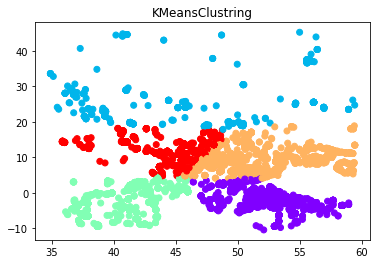

In [10]:
x = df.iloc[:,:]  
kmeans = KMeans(5, random_state=0)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters

plt.scatter(data_with_clusters['Longitude'],
  data_with_clusters['Latitude'],
  c=data_with_clusters['Clusters'],
  cmap='rainbow')
plt.title('KMeansClustring')
plt.show()

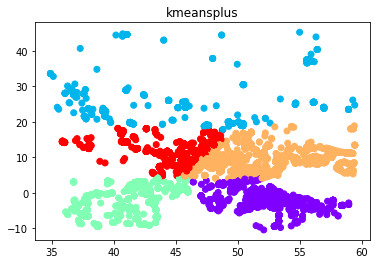

In [11]:
kmeansplus = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeansplus.fit_predict(x)
plt.scatter(data_with_clusters['Longitude'],
  data_with_clusters['Latitude'],
  c=kmeansplus.labels_,
  cmap='rainbow')
plt.title('kmeansplus')
plt.show() 

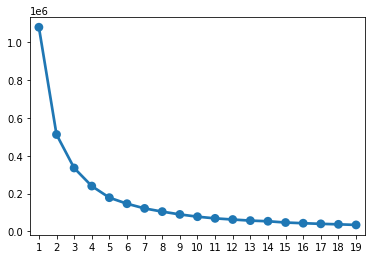

In [12]:
wcss = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(x)
    wcss[k] = kmeans.inertia_

sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))

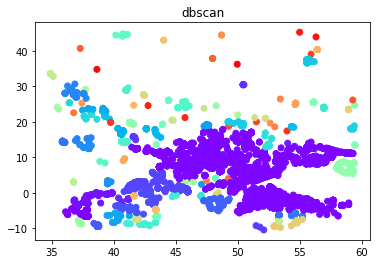

In [14]:
dbscan = DBSCAN(eps=0.9, min_samples=1 )
dbscan.fit_predict(x)
plt.scatter(data_with_clusters['Longitude'],
  data_with_clusters['Latitude'],
  c=dbscan.labels_,
  cmap='rainbow')
plt.title('dbscan')
plt.show()